In [2]:
# https://www.kaggle.com/fedesoriano/heart-failure-prediction/version/1
import pandas as pd

In [4]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [60]:
df.isna().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

Relação entre sexo e doença cardíaca

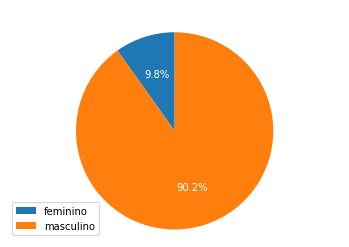

In [14]:
# Separando as instâncias que contêm doença cardíaca
df_doenca = df[df['HeartDisease'] == 1]

feminino = 0
masculino = 0

for sexo in df_doenca['Sex']:
    if sexo == 'F':
        feminino+=1
    else:
        masculino+=1

# Criando gráfico de setores
import matplotlib.pyplot as plt

# Conjunto de dados usados no gráfico
labels = ['feminino', 'masculino']
sizes = [50,458]

# Criando área de plotagem
fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=90, textprops=dict(color='w'))
ax1.set_title('Sexo de pacientes com doença cardíaca', color='w')
ax1.axis('equal') # A proporção igual garante que a pizza seja desenhada como um círculo

legenda = ['feminino','masculino']
plt.legend(legenda, loc=3)

plt.show()


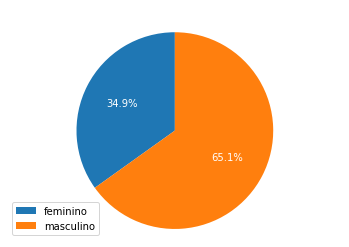

In [15]:
#Relação sexo e pacintes sem doença cardíaca
# Separando as instâncias que contêm doença cardíaca
df_doenca = df[df['HeartDisease'] == 0]

feminino = 0
masculino = 0

for sexo in df_doenca['Sex']:
    if sexo == 'F':
        feminino+=1
    else:
        masculino+=1

# Criando gráfico de setores
import matplotlib.pyplot as plt

# Conjunto de dados usados no gráfico
labels = ['feminino', 'masculino']
sizes = [143,267]

# Criando área de plotagem
fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=90, textprops=dict(color='w'))
ax1.set_title('Sexo de pacientes sem doença cardíaca', color='w')
ax1.axis('equal') # A proporção igual garante que a pizza seja desenhada como um círculo

legenda = ['feminino','masculino']
plt.legend(legenda, loc=3)

plt.show()

Relação dos tipos de dores no peito

In [25]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


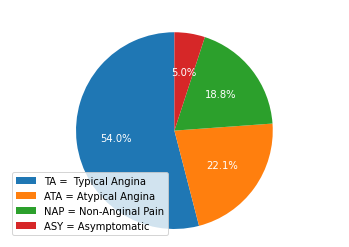

In [13]:
# TIPO DE DOR NO PEITO USANDO TODOS OS DADOS
#Verificar a ocorrência dos 4 tipos de dor em todos os pacientes

labels = [x for x in df.ChestPainType.value_counts().index]
values = [df.ChestPainType.value_counts()]
values = [496,203,173,46]

# Criando área de plotagem
fig1, ax1 = plt.subplots()

ax1.pie(values, labels=labels, autopct='%1.1f%%',startangle=90, textprops=dict(color='w'))
ax1.set_title('Tipo de dor no peito', color='w')
ax1.axis('equal') # A proporção igual garante que a pizza seja desenhada como um círculo

legenda = ['TA =  Typical Angina','ATA = Atypical Angina', 'NAP = Non-Anginal Pain', 'ASY = Asymptomatic']
plt.legend(legenda, loc=3)

plt.show()


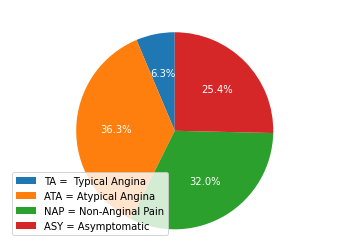

In [12]:
# TIPO DE DOR EM PESSOAS SEM DOENÇA
# Verificar a ocorrência dos 4 tipos de dor em pacientes sem doença cardíaca
df_nao_doenca = df[df['HeartDisease'] == 0]

TA = 0
ATA = 0
NAP = 0
ASY = 0

for tipo_dor in df_nao_doenca['ChestPainType']:
    if tipo_dor == 'TA':
        TA+=1
    if tipo_dor == 'ATA':
        ATA+=1
    if tipo_dor == 'NAP':
        NAP+=1
    if tipo_dor == 'ASY':
        ASY+=1


labels = ['TA','ATA','NAP','ASY']
values = [TA,ATA,NAP,ASY]

# Criando área de plotagem
fig1, ax1 = plt.subplots()

ax1.pie(values, labels=labels, autopct='%1.1f%%',startangle=90, textprops=dict(color='w'))
ax1.set_title('Tipo de dor no peito em pessoas sem doença cardíaca', color='w')
ax1.axis('equal') # A proporção igual garante que a pizza seja desenhada como um círculo

legenda = ['TA =  Typical Angina','ATA = Atypical Angina', 'NAP = Non-Anginal Pain', 'ASY = Asymptomatic']
plt.legend(legenda, loc=3)

plt.show()


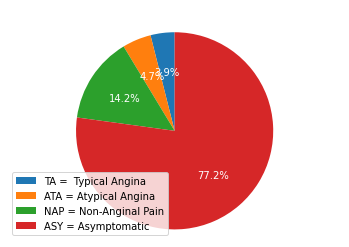

In [11]:
# TIPO DE DOR EM PESSOAS COM DOENÇA
# Verificar a ocorrência dos 4 tipos de dor em pacientes com doença cardíaca

df_doenca = df[df['HeartDisease'] == 1]

TA = 0
ATA = 0
NAP = 0
ASY = 0

for tipo_dor in df_doenca['ChestPainType']:
    if tipo_dor == 'TA':
        TA+=1
    if tipo_dor == 'ATA':
        ATA+=1
    if tipo_dor == 'NAP':
        NAP+=1
    if tipo_dor == 'ASY':
        ASY+=1


labels = ['TA','ATA','NAP','ASY']
values = [TA,ATA,NAP,ASY]

# Criando área de plotagem
fig1, ax1 = plt.subplots()

ax1.pie(values, labels=labels, autopct='%1.1f%%',startangle=90, textprops=dict(color='w'))
ax1.set_title('Tipo de dor no peito em pessoas com doença cardíaca', color='w')
ax1.axis('equal') # A proporção igual garante que a pizza seja desenhada como um círculo

legenda = ['TA =  Typical Angina','ATA = Atypical Angina', 'NAP = Non-Anginal Pain', 'ASY = Asymptomatic']
plt.legend(legenda, loc=3)

plt.show()

Relação idade: colesterol (Cholesterol), pressão sanguínea (RestingBP) e glicemia em jejum (FastingBS)
                   

In [73]:
age_group = df.groupby('Age').mean()
age_group.head()

,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,,,,,,
28,130.0,132.000000,0.0,185.000000,0.00,0.0
29,130.0,236.666667,0.0,177.333333,0.00,0.0
30,170.0,237.000000,0.0,170.000000,0.00,0.0
31,110.0,244.500000,0.0,151.500000,0.75,0.5
32,110.6,241.200000,0.2,152.200000,0.14,0.4


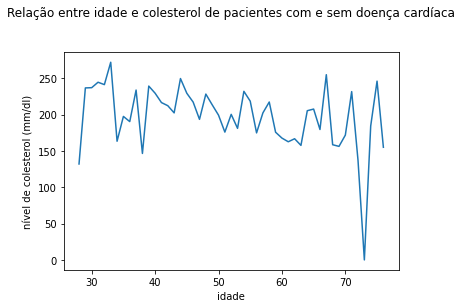

In [79]:
# Relação idade e colesterol

idade = range(28,77)
instancias = age_group.iloc[0:49, 1]

plt.plot(idade, instancias)
plt.xticks()
plt.title('Relação entre idade e colesterol de pacientes com e sem doença cardíaca\n\n')
plt.xlabel('idade')
plt.ylabel('nível de colesterol (mm/dl)')
plt.show()

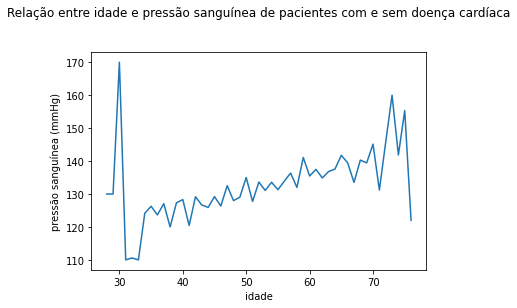

In [78]:
# Relação idade e pressão sanguínea

idade = range(28,77)
instancias = age_group.iloc[0:49, 0]

plt.plot(idade, instancias)
plt.title('Relação entre idade e pressão sanguínea de pacientes com e sem doença cardíaca\n\n')
plt.xlabel('idade')
plt.ylabel('pressão sanguínea (mmHg)')
plt.xticks()
plt.show()

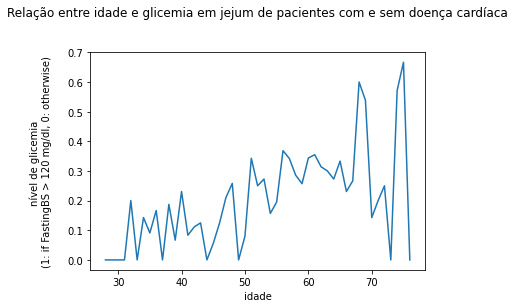

In [82]:
# Relação idade e glicemia em jejum

idade = range(28,77)
instancias = age_group.iloc[0:49, 2]

plt.plot(idade, instancias)
plt.title('Relação entre idade e glicemia em jejum de pacientes com e sem doença cardíaca\n\n')
plt.xlabel('idade')
plt.ylabel('nível de glicemia \n(1: if FastingBS > 120 mg/dl, 0: otherwise)\n')
plt.xticks
plt.show()

Relação portador de doença cardíaca com colesterol (Cholesterol), pressão sanguínea (RestingBP) e glicemia em jejum (FastingBS)

In [8]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
# Número de instâncias em casa um dos grupos de classificação de doença cardíaca
# Verifica que há uma quantidade aproximada de pacientes nos dois grupos
number = df.groupby('HeartDisease').count()
number

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
HeartDisease,,,,,,,,,,,
0,410,410,410,410,410,410,410,410,410,410,410
1,508,508,508,508,508,508,508,508,508,508,508


In [10]:
# Agrupamento por diagnóstico de doença cardíaca
disease_group = df.groupby('HeartDisease').mean()
disease_group

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,
0,50.551220,130.180488,227.121951,0.107317,148.151220,0.408049
1,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213


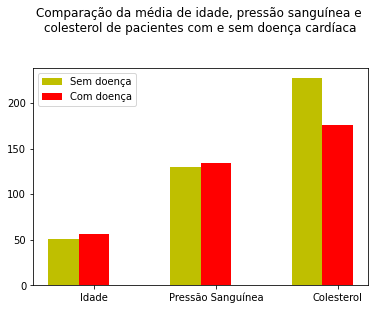

In [72]:
# Comparação de idade, pressão sanguínea e colesterol de pacientes com e sem doença cardíaca
import matplotlib.pyplot as plt
import numpy as np

''' Não funcionou
# Valores do grupo sem doença

                    #Age, RestingBP, Cholesterol
#sem_doenca = [disease_group.iloc[0,0], disease_group.iloc[0,1], disease_group[0,2]]
sem_doenca = disease_group[0,0:3]

# Valores do grupo com doença
                    #Age, RestingBP, Cholesterol
#com_doenca = [disease_group.iloc[1,0], disease_group.iloc[1,1], disease_group[1,2]]
com_doenca = disease_group[1, 0:3]
'''

# Valores do grupos
sem_doenca = [50.55, 130.180488, 227.121951]
com_doenca = [55.89, 134.185039, 175.940945]

# Cria eixo x para produto A e produto B com uma separação de 0.25 entre as barras
x1 =  np.arange(len(sem_doenca))
x2 = [x + 0.25 for x in x1]

# Plota as barras
plt.bar(x1, sem_doenca, width=0.25, label = 'Sem doença', color = 'y')
plt.bar(x2, com_doenca, width=0.25, label = 'Com doença', color = 'r')

# Coloca o nome de medidas como label do eixo x
medidas = ['Idade','Pressão Sanguínea','Colesterol']
plt.xticks([x + 0.25 for x in range(len(sem_doenca))], medidas)

# Insere uma legenda no gráfico
plt.legend()

plt.title("Comparação da média de idade, pressão sanguínea e \ncolesterol de pacientes com e sem doença cardíaca\n\n")
plt.show()


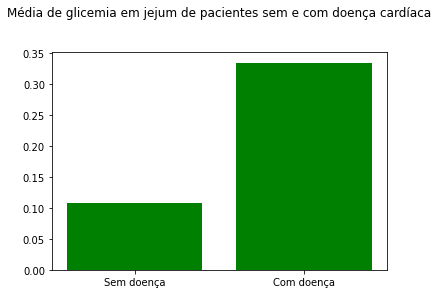

In [35]:
# Comparação da média de glicemia em jejum de pacientes com e sem doença cardíaca
# Eixo x
grupos = ['Sem doença', 'Com doença']

# Eixo y
glicemia_sem_doenca = disease_group.iloc[0,3]
glicemia_com_doenca = disease_group.iloc[1,3]
valores = [glicemia_sem_doenca, glicemia_com_doenca]

plt.bar(grupos, valores, color='g')
plt.title('Média de glicemia em jejum de pacientes sem e com doença cardíaca\n\n')
plt.show()